<a href="https://colab.research.google.com/github/HowardHNguyen/Marketing_Data_Science/blob/main/General_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# percentage
def percentage(a,b):
  if b== 0:
    return None
  return ((a/b)*100)

In [ ]:
percentage(41,135)

30.37037037037037

In [ ]:
# read data files and merge them together
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/LoanMe - Consumer Repeat Eligible10012021.csv')

data.head(2)

,LOANID,FIRSTNAME,LASTNAME,STATEWHENFUNDED,MOBILEPHONE,HOMEPHONE,EMAIL,ADDRESS1,ADDRESS2,CITY,STATE,ZIP,AMOUNT,FUNDINGDATE,PAYOFFDATE,STATICANALYSIS_PRODUCT,LOANTYPE,DIS_OPTIN_MARKETING,SOURCENAME,VENDOR_NAME
0,4895469.0,MICHAEL,MURRAY,SC,NaN,8642703227,VOLLEYM2@YAHOO.COM,317 STARBOARD TACK,NaN,GREENWOOD,SC,29649,3700.0,1/16/2020,5/19/2021,Flex NonCA 2K-4K,LTP,True,Amerifirst,Lending Tree - C
1,1812032.0,JEAN,QUINN,CA,916-640-5123,NaN,ms.rhino@yahoo.com,313 BYRON AVE W,NaN,MOBILE,AL,36609,3100.0,5/4/2017,2/28/2018,3100,LTP,NaN,P2,Lending Tree - C


In [ ]:
data.shape

(87428, 20)

In [ ]:
# count duplicate on a column
data.EMAIL.duplicated().sum()

343

In [ ]:
ids = data['EMAIL']
data[ids.isin(ids[ids.duplicated()])]

In [ ]:
# generate duplicated list
dup_list = data.loc[data.LOANID.duplicated(), :]
dup_list

,LOANID,FIRSTNAME,LASTNAME,STATEWHENFUNDED,MOBILEPHONE,HOMEPHONE,EMAIL,ADDRESS1,ADDRESS2,CITY,STATE,ZIP,AMOUNT,FUNDINGDATE,PAYOFFDATE,STATICANALYSIS_PRODUCT,LOANTYPE,DIS_OPTIN_MARKETING,SOURCENAME,VENDOR_NAME
1933,1.000000e+11,YARELIS,ESPOLA,TX,787-902-0255,NaN,yrespola@gmail.com,908 GRAND STATION PARKWAY APT 26010,NaN,LEWISVILLE,TX,75057,2600.0,3/6/2020,9/15/2020,CAB Product,CAB,False,P2,Monevo - C
2719,1.000000e+11,ANZIE,NICHOLSON,TX,NaN,940-435-3176,anzienicholson@gmail.com,"892 UNION STATION PKWY, #8309",NaN,LEWISVILLE,TX,75057,3120.0,3/10/2020,10/23/2020,CAB Product,CAB,False,P2,Monevo - C
3176,1.000000e+11,EDDY,MORROW,MO,8168781903,8168781903,eddymorrow@gmail.com,4050 NE CHAUMIERE RD,NaN,KANSAS CITY,MO,64117,2000.0,3/6/2020,3/26/2021,Flex NonCA 1K-2K,LTP,False,Amerifirst,LoanMe Direct Mail Consumer
3312,1.000000e+11,STEVE,MURPHY,MO,NaN,314-779-4441,stevemurphy69@live.com,"400 N 4TH ST, APT 2608",NaN,SAINT LOUIS,MO,63102,2000.0,3/5/2020,6/9/2020,Flex NonCA 1K-2K,LTP,False,P2,QuinStreet - C
4140,1.000000e+11,BENJAMIN,ROBERTS,MO,NaN,913-213-4366,brobe128@live.com,1704 SOUTHWEST SUNSET STREET,NaN,BLUE SPRINGS,MO,64015,2000.0,3/13/2020,6/4/2020,Flex NonCA 1K-2K,LTP,False,P2,LoanME Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84272,1.000000e+11,JAIME,BERNAL,TX,NaN,682-360-7633,jabernal1987@gmail.com,4005 MICKI LYNN AVE.,NaN,FORT WORTH,TX,76107,3120.0,3/6/2020,10/23/2020,CAB Product,CAB,False,P2,QuinStreet - C
84735,1.000000e+11,CECELIA,KEESWOOD,NM,NaN,5055928586,CECELIAKEESWOOD51@GMAIL.COM,46 RD 6219,NaN,KIRTLAND,NM,87417,2000.0,3/12/2020,3/1/2021,Flex NonCA 1K-2K,LTP,True,Amerifirst,LoanME Organic
84979,1.000000e+11,MICHELLE,BENNETT,MO,2178517023,2178517023,BENNETTMICHELLE980@GMAIL.COM,8729 WHITE AVE,NaN,SAINT LOUIS,MO,63144,1000.0,3/10/2020,4/7/2021,Flex NonCA 1K-2K,LTP,False,Amerifirst,LoanMe Direct Mail Consumer
85263,1.000000e+11,ANDREW,GLOVER,SC,NaN,919-519-9112,gluv4965@yahoo.com,195 WEATHERS ST,NaN,BOWMAN,SC,29018,2000.0,3/9/2020,9/1/2020,Flex NonCA 1K-2K,LTP,False,P2,Monevo - C


In [ ]:
# exporting file
dup_list.to_csv('/content/drive/MyDrive/data/Consumer Repeat Eligible10012021-DUPLICATES.csv')

In [ ]:
data.groupby('STATEWHENFUNDED')['LOANID'].count()

STATEWHENFUNDED
AZ      361
CA    76580
DE      453
FL      548
ID      754
IL      114
IN      119
KY      106
MI      181
MN       77
MO     2495
MS       41
MT       11
NE       40
NM      688
OH      197
OK       26
SC     1509
TN       94
TX      358
UT     1319
VA      271
WI     1086
Name: LOANID, dtype: int64

In [ ]:
# dropping duplicated rows
data.drop_duplicates()

In [ ]:
# count non duplicate on a column
(~data.LOANID.duplicated()).sum()

87343

In [ ]:
# drop and remove duplicate - inplace =True
# data.drop_duplicates(inplace=True)
import numpy as np
# drop duplicate based on Id column
data = data_merged.drop_duplicates(subset='Id', keep="first")

In [ ]:
# fewer columns
data_clean = data.drop(['Unnamed: 0','Internal_Score__c','SBLManager_Lookup__c','Name','State_Code','Borrower_Type__c','CampaignId__c','Business_History_Months__c',
                           'Business_Monthly_Revenue__c','Business_Name__c','Business_State__c',
                          'Id','Dis_Other_Messaging__c','Sanco_Status__c','Sanco_Lead_Id__c','Mailer_ID__c','Loan_Partner__c',
                          'Highest_Step__c','Original_Loan_Agent__c','Lead_Creator__c','Preferred_Language__c','SSN_Verification__c',
                          'Selected_Product__c','PartnerAccountId','MiddleName','MasterRecordId','IndividualId','ConvertedOpportunityId',
                          'ConvertedContactId','ConvertedAccountId','OwnerId','Pricing_Version__c','RecordTypeId','LastModifiedById',
                          'CreatedById','Referral__c', 'Loan_Agent__c','AnnualRevenue','Affiliate_ID_Number__c','DoNotCall','Mailer_Approved__c'], axis=1)
data_clean.tail(3)

In [ ]:
data.groupby('Affiliate_Name__c')['CreatedDate'].count()

Affiliate_Name__c
1 West Finance               35
1ST AMERICAN FINANCE LLC      4
1st Capital Financial         1
1st Capital Source            7
1st Shield                    8
                             ..
iServices Inc.                2
merchant funding partners    13
mpb capital consulting        1
singhs capital group         64
werkwallet                   19
Name: CreatedDate, Length: 529, dtype: int64

In [ ]:
data_organic = data_clean[data_clean.Affiliate_Name__c == 'Google, Inc.']
data_organic.head(2)

,Campaign__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted
423,7011U000000hXgOQAU,5/21/2021 2:41:09 PM,11/23/1992 12:00:00 AM,begzkel2@gmail.com,False,KELLY,BEGLEY,Pending Approval,NaN,3000,7085176674,NaN,Other,Duplicate,"Google, Inc.",False,0,False
717,7011U000000hXgOQAU,6/9/2021 8:00:55 AM,10/5/1990 12:00:00 AM,wallacefamilyservices@yahoo.com,False,BRITTANY,WALLACE,Denied,NaN,14000,3147131105,NaN,MO,New,"Google, Inc.",False,3000,False


In [ ]:
data_clean['CreatedDate'].unique()

array(['5/24/2021 11:56:19 AM', '5/24/2021 11:34:01 AM',
       '5/24/2021 11:34:12 AM', ..., '8/23/2021 8:38:31 PM',
       '8/23/2021 8:38:36 PM', '8/23/2021 8:38:41 PM'], dtype=object)

In [ ]:
data_clean['CreatedDate'].sort_values()

533347     2/24/2021 11:19:46 AM
533346      2/24/2021 9:44:31 AM
533348     2/25/2021 11:26:58 AM
533349     2/26/2021 10:43:19 AM
533350      2/26/2021 4:28:44 PM
                   ...          
2423231      9/9/2021 9:59:51 AM
2423234      9/9/2021 9:59:53 AM
2423235      9/9/2021 9:59:55 AM
2423236      9/9/2021 9:59:55 AM
2171809      9/9/2021 9:59:58 AM
Name: CreatedDate, Length: 2556492, dtype: object

In [ ]:
data_organic.shape

(4114, 18)

In [ ]:
data_organic_by_campaign = data_clean[data_clean.Campaign__c == '7011U000000hXgOQAU']
data_organic_by_campaign.head(2)

,Campaign__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted
423,7011U000000hXgOQAU,5/21/2021 2:41:09 PM,11/23/1992 12:00:00 AM,begzkel2@gmail.com,False,KELLY,BEGLEY,Pending Approval,NaN,3000,7085176674,NaN,Other,Duplicate,"Google, Inc.",False,0,False
717,7011U000000hXgOQAU,6/9/2021 8:00:55 AM,10/5/1990 12:00:00 AM,wallacefamilyservices@yahoo.com,False,BRITTANY,WALLACE,Denied,NaN,14000,3147131105,NaN,MO,New,"Google, Inc.",False,3000,False


In [ ]:
data_organic_by_campaign.shape

(4114, 18)

# Metrics from LoanMePrime.com - C

In [ ]:
data_ppc_lmp_c = data_clean[data_clean.Affiliate_Name__c == 'LoanMePrime.com - C']
data_ppc_lmp_c.head(2)

,Campaign__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted
403,7011U000000hSjDQAU,5/21/2021 2:39:57 PM,8/17/1984 12:00:00 AM,christianhall12307@gmail.com,False,CHRISTOPHER,HALL,Denied,NaN,3600,9417358664,NaN,FL,Failed Prequal,LoanMePrime.com - C,False,0,False
933,7011U000000hSjDQAU,5/28/2021 8:28:39 AM,10/30/1981 12:00:00 AM,stephenv262@gmail.com,False,STEPHEN,VAZQUEZ,Denied,NaN,4300,3215584202,NaN,FL,Failed Prequal - Bad Credit Pull,LoanMePrime.com - C,False,0,False


In [ ]:
data_ppc_lmp_c.shape

(15636, 18)

In [ ]:
data_ppc_lmp_c.groupby('CreatedDate')['Campaign__c'].count()

CreatedDate
3/26/2021 10:01:09 AM    1
3/26/2021 10:12:14 AM    1
3/26/2021 10:22:05 AM    1
3/26/2021 10:27:35 AM    1
3/26/2021 10:31:05 AM    1
                        ..
9/9/2021 9:33:38 AM      1
9/9/2021 9:45:06 AM      1
9/9/2021 9:47:50 AM      1
9/9/2021 9:50:01 AM      1
9/9/2021 9:59:19 AM      1
Name: Campaign__c, Length: 15596, dtype: int64

In [ ]:
data_ppc_lmp_c.groupby('Status')['IsConverted'].count()

Status
Appointment Set                       11
Bad Contact Info                      76
Broker Commission Set                  1
Call Transferred                      33
Call successful                       39
Called - Left Message               2144
Called - No Contact                  697
Converted                           1638
Duplicate                            224
Failed Prequal                      8330
Failed Prequal - Bad Credit Pull     780
New                                  737
No Bank Account                       21
No answer                             19
Non Supported State                   47
Not Interested                       260
Not Qualified                        215
Pitched                                9
Pre-Paid Card                         37
Rejected Lead                        318
Name: IsConverted, dtype: int64

In [ ]:
# count duplicate on a column
data_organic.Email.duplicated().sum()

593

In [ ]:
data_organic.groupby('Status')['IsConverted'].count()

Status
Appointment Set                        3
Bad Contact Info                       8
Call Transferred                      10
Call successful                        1
Called - Left Message                275
Called - No Contact                   88
Converted                            297
Duplicate                           1573
Failed Prequal                      1520
Failed Prequal - Bad Credit Pull      92
New                                   47
No Bank Account                        4
No answer                              4
Non Supported State                   26
Not Interested                        30
Not Qualified                         20
Pending                                1
Pitched                                3
Pre-Paid Card                         10
Rejected Lead                         87
Sanco                                 15
Name: IsConverted, dtype: int64

In [ ]:
data_clean.groupby('Status')['IsConverted'].count()

Status
Appointment Set                         854
Bad Contact Info                       5705
Broker Commission Set                    11
Call Transferred                       1094
Call successful                        2212
Called - Left Message                130652
Called - No Contact                   33393
Converted                             46789
Duplicate                             10040
Failed Prequal                        60507
Failed Prequal - Bad Credit Pull       3577
Lending Tree - Prequal                 1067
New                                   19793
No Bank Account                        1170
No answer                               955
Non Supported State                    1099
Not Interested                        18746
Not Qualified                          6774
Pending                                2312
Pending Broker Commission               114
Pending Prequal                        5698
Pitched                                 776
Pre-Paid Card            

In [ ]:
lt_campaign = data_clean.groupby('Campaign__c')['IsConverted'].count()

In [ ]:
data_lt_cam = data_clean[data_clean.Campaign__c == '7011U000000fXLIQA2']
data_lt_cam.head(2)

,Campaign__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted
1952,7011U000000fXLIQA2,6/11/2021 7:17:47 AM,12/18/1970 12:00:00 AM,marlowecharlotte@gmail.com,False,CHARLOTTE,MARLOWE,Denied,NaN,3000,8432899400,NaN,SC,Bad Contact Info,Liberty Tax Service,False,500,False
4653,7011U000000fXLIQA2,6/13/2021 2:39:38 PM,7/16/1963 12:00:00 AM,jkaddatz1@yahoo.com,False,JAMES,KADDATZ,Denied,NaN,4800,4142333891,NaN,WI,Not Qualified,Liberty Tax Service,False,2800,False


In [ ]:
data_lt_cam = data_clean[data_clean.Campaign__c == '7011U000000fXLIQA2']
data_lt_cam.head(2)

,Campaign__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted
1952,7011U000000fXLIQA2,6/11/2021 7:17:47 AM,12/18/1970 12:00:00 AM,marlowecharlotte@gmail.com,False,CHARLOTTE,MARLOWE,Denied,NaN,3000,8432899400,NaN,SC,Bad Contact Info,Liberty Tax Service,False,500,False
4653,7011U000000fXLIQA2,6/13/2021 2:39:38 PM,7/16/1963 12:00:00 AM,jkaddatz1@yahoo.com,False,JAMES,KADDATZ,Denied,NaN,4800,4142333891,NaN,WI,Not Qualified,Liberty Tax Service,False,2800,False


In [ ]:
data_lt_cam.shape

(2461, 18)

In [ ]:
data_clean.groupby('State__c')['Is_Homeowner__c'].count()

In [ ]:
percentage(320,2461)

13.00284437220642

In [ ]:
data.groupby('Affiliate_Name__c')['IsConverted'].count()

In [ ]:
# % of 'rejected lead'
percentage(111617,2136057)

5.225375540072198

In [ ]:
# % of New coming leads
percentage(16809,2136057)

0.7869172030521657

In [ ]:
# drop empty-valued columns
data_big = data.drop(['Internal_Score__c','SBLManager_Lookup__c','State_Code','Borrower_Type__c','Campaign__c',
                          'CampaignId__c','Id','Dis_Other_Messaging__c','Sanco_Status__c','Sanco_Lead_Id__c','Mailer_ID__c','Loan_Partner__c',
                          'Highest_Step__c','Original_Loan_Agent__c','Lead_Creator__c','Preferred_Language__c','SSN_Verification__c',
                          'Selected_Product__c','PartnerAccountId','MiddleName','MasterRecordId','IndividualId','ConvertedOpportunityId',
                          'ConvertedContactId','ConvertedAccountId','OwnerId','Pricing_Version__c','RecordTypeId','LastModifiedById',
                          'CreatedById','Referral__c', 'Loan_Agent__c','AnnualRevenue','Affiliate_ID_Number__c','DoNotCall','Mailer_Approved__c'], axis=1)
data_big.tail(3)

,Unnamed: 0,Name,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted
2136054,1523265,ANA URIAS,NaN,NaN,NaN,NaN,7/29/2021 9:45:55 PM,8/12/1992 12:00:00 AM,urias0317p@gmail.com,False,ANA,URIAS,Denied,NaN,3250,4802987671,5000.0,AZ,Rejected Lead,Lending Tree - C,False,0,False
2136055,1523266,SEAN BIEMAN,NaN,NaN,NaN,NaN,7/29/2021 9:46:02 PM,1/15/1997 12:00:00 AM,sean.bieman@gmail.com,False,SEAN,BIEMAN,Denied,NaN,3718,5743229622,1000.0,IN,Rejected Lead,Lending Tree - C,False,0,False
2136056,1523267,ASHLEY ROBERTA,NaN,NaN,NaN,NaN,7/29/2021 9:47:08 PM,4/9/1993 12:00:00 AM,ashley.popperwell@gmail.com,False,ASHLEY,ROBERTA,Denied,NaN,2500,4057656324,2000.0,OK,Rejected Lead,Lending Tree - C,False,0,False


In [ ]:
# small size file for analysis
data_sm = data.drop(['Unnamed: 0','Name','Business_History_Months__c','Business_Monthly_Revenue__c','Status','Requested_Loan_Amount__c','Monthly_Income__c','Loan_Status__c','Date_of_Birth_DOB__c','Business_State__c','Internal_Score__c','SBLManager_Lookup__c','State_Code','Borrower_Type__c','Campaign__c','CampaignId__c','Id','Dis_Other_Messaging__c','Sanco_Status__c','Sanco_Lead_Id__c','Mailer_ID__c','Loan_Partner__c','Highest_Step__c','Original_Loan_Agent__c',
           'Lead_Creator__c','Preferred_Language__c','SSN_Verification__c','Selected_Product__c','PartnerAccountId','MiddleName','MasterRecordId','IndividualId',
           'ConvertedOpportunityId','ConvertedContactId','ConvertedAccountId','OwnerId','Pricing_Version__c','RecordTypeId','LastModifiedById','Loan_Amount__c',
           'CreatedById','Referral__c', 'Loan_Agent__c','AnnualRevenue','Affiliate_ID_Number__c','DoNotCall','Mailer_Approved__c'], axis=1)
data_sm.head(3)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
0,NaN,5/24/2021 11:56:19 AM,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,6063594267,8592673208,KY,Loanry - C,False,False
1,NaN,5/24/2021 11:34:01 AM,debose34@gmail.com,False,STEVE,DEBOSE,4073145448,4073145448,FL,Monevo - C,False,False
2,NaN,5/24/2021 11:34:12 AM,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,3027503090,3027503090,DE,QuinStreet - C,True,False


In [ ]:
data_sm['HasOptedOutOfEmail'].value_counts()

False    2556127
True         365
Name: HasOptedOutOfEmail, dtype: int64

In [ ]:
percentage(329,2135728)

0.015404583355183807

In [ ]:
100 - 0.015

99.985

# FLORIDA DATA ANALYSIS

In [ ]:
data_fl = data_sm[data_sm.State__c == 'FL']
data_fl.head(2)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
1,NaN,5/24/2021 11:34:01 AM,debose34@gmail.com,False,STEVE,DEBOSE,4073145448,4073145448,FL,Monevo - C,False,False
6,NaN,5/24/2021 11:34:21 AM,marshallwilliams61@yahoo.com,False,MARSHALL,WILLIAMS,7275644326,7275644326,FL,Loanry - C,False,False


In [ ]:
data_fl.shape

(443227, 12)

In [ ]:
# Florida Homeowners
data_fl_homeowner = data_fl[data_fl.Is_Homeowner__c == True]
data_fl_homeowner.head(2)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
15,NaN,5/24/2021 11:34:29 AM,ramdaschandra@hotmail.com,False,RAMDAS,CHANDRA,NaN,9544480552,FL,Lending Tree - C,True,False
58,NaN,5/24/2021 12:42:30 PM,sekhmetemi@gmail.com,False,ELLEN,ISABEL,5612362502,5612362502,FL,Loanry - C,True,False


In [ ]:
data_fl_homeowner.shape

(56026, 12)

In [ ]:
percentage(56026,443227)

12.640475422300538

In [ ]:
data_fl_homeowner_Biz = data_fl_homeowner[data_fl_homeowner.Business_Name__c != 'NaN']
data_fl_homeowner_Biz.head(2)

In [ ]:
# FILTER TO SELECT ONLY - FL + HOMEOWNER + Businesses
list_fl_homeowner_biz = data_fl_homeowner['Business_Name__c'].notnull()
df_SBL_BizName_not_null = data_fl_homeowner[list_fl_homeowner_biz]

In [ ]:
df_SBL_BizName_not_null.head(5)

In [ ]:
# List of Fl Business only - consumers + sbl
list_fl_businessOnly = data_fl[data_fl['Business_Name__c'].notnull()]
list_fl_businessOnly.head(3)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
3172,RE-COM INC,7/13/2021 12:24:42 PM,recomutility@gmail.com,False,RYLEE,BERNIER,321-349-6767,321-349-6767,FL,Circadian Funding,False,True
13456,K KRFAT,6/22/2021 12:00:56 PM,bizservices@humanoid.net,False,STACEY,WILSON,8507572522,8508003081,FL,Leap Theory - C,False,False
15435,DONNIS PAINTING ENTERPRISES,6/22/2021 9:42:45 AM,donispainting@gmail.com,False,GERBER,DONIS,9546917741,9546917741,FL,CaptainCapitalGroup LLC,False,False


In [ ]:
list_fl_businessOnly.shape

(562, 12)

In [ ]:
fl_business_name = data_fl['Business_Name__c'].isnull().value_counts()
fl_business_name.head()

True     369049
False       562
Name: Business_Name__c, dtype: int64

In [ ]:
FL_Biz_HO = list_fl_businessOnly[list_fl_businessOnly.Is_Homeowner__c == True]
FL_Biz_HO.head(2)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
16794,DG S SOLUTIONS LLC,6/3/2021 10:02:07 AM,javierlorenzo14@yahoo.com,False,YVETTE,CARBONELL,4072020791,4072020791,FL,Lendio,True,False
24993,AAA CARTER LOGISTICS,7/7/2021 1:55:07 PM,ascarter81@gmail.com,False,ANTWAN,CARTER,NaN,5613811297,FL,Cor Funding LLC,True,False


In [ ]:
FL_Biz_HO.shape

(48, 12)

# CA DATA ANALYSIS

In [ ]:
data_ca = data_sm[data_sm.State__c == 'CA']
data_ca.head(2)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
90,NaN,5/24/2021 12:43:34 PM,gladdenm3@gmail.com,False,MARK,GLADDEN,NaN,5622259877,CA,Credit Sesame - C,False,False
210,NaN,5/24/2021 3:38:50 PM,luisalepe@live.com,False,LUISA,LEPE,NaN,8183185491,CA,Lending Tree - C,False,False


In [ ]:
data_ca.shape

(60206, 12)

In [ ]:
data_sm.shape

(2556492, 12)

In [ ]:
percentage(8049,60206)

13.369099425306446

In [ ]:
# CA Homeowners
data_ca_homeowner = data_ca[data_ca.Is_Homeowner__c == True]
data_ca_homeowner.head(2)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
229,NaN,5/24/2021 12:47:10 PM,rebecca_castelo@yahoo.com,False,REBECCA,CASTELO,4086440828,4086440828,CA,QuinStreet - C,True,False
1225,NaN,5/27/2021 10:18:54 AM,tinango85@yahoo.com,False,TINA,NGO,NaN,5626078391,CA,Lending Tree - C,True,False


In [ ]:
data_ca_homeowner.shape

(8049, 12)

In [ ]:
# List of CA Business only - consumers + sbl
list_ca_businessOnly = data_ca[data_ca['Business_Name__c'].notnull()]
list_ca_businessOnly.head(3)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
3467,AFFORDABLE PORTABLE WELDING AND FABRICATION,6/4/2021 3:36:02 PM,rharris4200@yahoo.com,False,RUSSELL,HARRIS,5303190422,5303190422,CA,LoanMeBusiness Google - B,False,False
3589,BUNDLES OF JOY HAIR EXTENSIONS,6/4/2021 3:32:43 PM,c_rowles@yahoo.com,False,CRYSTAL,ROWLES,NaN,3239846352,CA,LoanMeBusiness Google - B,False,True
8878,SINS ELECTRIC SHOP,7/10/2021 5:19:06 PM,geraina.quiles007@gmail.com,False,GERAINA,QUILES,NaN,6504606697,CA,Credit Sesame - C,False,True


In [ ]:
list_ca_businessOnly.shape

(1753, 12)

In [ ]:
CA_Biz_HO = list_ca_businessOnly[list_ca_businessOnly.Is_Homeowner__c == True]
CA_Biz_HO.head(2)

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone,State__c,Affiliate_Name__c,Is_Homeowner__c,IsConverted
57051,SUKH LAKH JASS BOPARAI INC,4/22/2021 8:04:05 AM,lakhboparai87@gmail.com,False,LAKHWINDER,SINGH,7323203601,7323203601,CA,United Funding Solutions,True,True
76772,ANTHONY BENIGNO PSYD PSYCHOLOGICAL SERVICES PC,6/25/2021 10:34:25 AM,drbenigno@abpsychconsulting.com,False,ANTHONY,BENIGNO,650-303-5884,650-303-5884,CA,Go Cap Advance,True,True


In [ ]:
CA_Biz_HO.shape

(162, 12)

In [ ]:
# drop some columns
data_2603 = data.drop(['Internal_Score__c','SBLManager_Lookup__c','State_Code','Borrower_Type__c','Business_History_Months__c','Name',
                          'Id','Dis_Other_Messaging__c','Sanco_Status__c','Sanco_Lead_Id__c','Mailer_ID__c','Loan_Partner__c','Business_Monthly_Revenue__c',
                          'Highest_Step__c','Original_Loan_Agent__c','Lead_Creator__c','Preferred_Language__c','SSN_Verification__c',
                          'Selected_Product__c','PartnerAccountId','MiddleName','MasterRecordId','IndividualId','ConvertedOpportunityId',
                          'ConvertedContactId','ConvertedAccountId','OwnerId','Pricing_Version__c','RecordTypeId','LastModifiedById',
                          'CreatedById','Referral__c', 'Loan_Agent__c','AnnualRevenue','Affiliate_ID_Number__c','DoNotCall','Mailer_Approved__c'], axis=1)
data_2603.head(3)

In [ ]:
data_2603.shape

(2054097, 21)

In [ ]:
df_july = data_2603.loc[(data_clean['CreatedDate'] >= '7/1/2021') & (data_clean['CreatedDate'] <= '7/31/2021')]
df_july.head(2)

,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted
2576,NaN,NaN,7011U000000hSb0QAE,2094.0,7/10/2021 12:03:16 AM,7/6/1978 12:00:00 AM,shannondaniel125@gmail.com,False,SHANNON,DANIEL,Pending Approval,NaN,3500,7408020023,1000.0,OH,Rejected Lead,Lending Tree - C,False,0,False
2590,NaN,NaN,7011U000000hVmNQAU,3767.0,7/10/2021 7:23:25 AM,6/28/1964 12:00:00 AM,zatoichi3756@gmail.com,False,JAMES,CARTER,Pending Approval,NaN,2340,3146014071,20000.0,MO,No answer,LoanME Organic,False,2500,False


In [ ]:
#df_july['CampaignId__c' == '2603']
df_july.groupby('CampaignId__c').count()

In [ ]:
data_sbl_big.shape

(2054097, 22)

In [ ]:
data_sbl_sm.shape

(2054097, 8)

In [ ]:
data_sbl_sm['Business_Name__c'].isnull().value_counts()

True     2045130
False       8967
Name: Business_Name__c, dtype: int64

In [ ]:
percentage(8967,2045130)

0.4384562350559622

In [ ]:
# Drop rows with specific column as NULL:

In [ ]:
vector_sbl_not_null = data_sbl_sm['Business_Name__c'].notnull()
df_not_null = data_sbl_sm[vector_sbl_not_null]

In [ ]:
df_not_null.to_excel ('/content/drive/MyDrive/data/test_file_without_null_rows.xlsx', sheet_name='sheet1', index = None, header=True)

In [ ]:
test_df_sbl_sm = pd.read_excel('/content/drive/MyDrive/data/test_file_without_null_rows.xlsx')
test_df_sbl_sm.head()

,Business_Name__c,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,MobilePhone,Phone
0,WILFREDS SUPERIOR TAILOR,8/9/2021 9:41:55 AM,nineout@verizon.net,False,ROBERT,ROSARIO,2018924150,2122423030
1,SAME DAY APPLIANCE REPAIR LLC,8/9/2021 9:35:51 AM,beasleyk74@aol.com,False,KIM,BEASLEY,910-747-1100,910-747-1100
2,IRON ROOSTER-ANNAPOLIS,8/9/2021 9:28:39 AM,carl@iron-rooster.com,False,CARL,WERNER,4439345721,4439345721
3,DREAM HOME ONE LLC,8/9/2021 9:22:34 AM,dreamhomeonellc@gmail.com,False,CARLOS,BAEZ-MORA,301-532-6868,301-532-6868
4,CHEWIEROAR LLC,8/9/2021 9:19:39 AM,daniel.yoon87@gmail.com,False,DANIEL,YOON,7147284162,7147284162


In [ ]:
df_sbl_sm.shape

(7727, 8)

In [ ]:
data_sbl_sm['HasOptedOutOfEmail'].value_counts()

False    2135728
True         329
Name: HasOptedOutOfEmail, dtype: int64

In [ ]:
df_sbl_sm.corr()

,HasOptedOutOfEmail
HasOptedOutOfEmail,1.0


In [ ]:
df_sbl_sm['Business_Name__c'].value_counts()

MARTIN TRUCKING SERVICE INC      8
FOAM IT LLC                      7
UBER                             7
x                                6
KASHI                            6
                                ..
GENESIS IMPORTS & EXPORTS LLC    1
EVERYTHING HOMECARE              1
ROYAL DREAM TRADING LLC          1
SHELVYS LUXURY SERVICES LLC      1
BEHAVIORAL BOXING                1
Name: Business_Name__c, Length: 6734, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

%matplotlib inline
rcParams['figure.figsize']=5,4

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [ ]:
sb.pairplot(df_sbl)

In [ ]:
# drop empty-valued columns
data_clean = data.drop(['State_Code','Sanco_Status__c','Sanco_Lead_Id__c','Mailer_ID__c','Loan_Partner__c','Highest_Step__c','Original_Loan_Agent__c',
           'Lead_Creator__c','Preferred_Language__c','SSN_Verification__c','Selected_Product__c','PartnerAccountId','MiddleName','MasterRecordId','IndividualId',
           'ConvertedOpportunityId','ConvertedContactId','ConvertedAccountId','Business_State__c','Business_Name__c','Business_Monthly_Revenue__c',
           'Business_History_Months__c','SBLManager_Lookup__c','OwnerId','Pricing_Version__c','RecordTypeId','LastModifiedById',
           'CreatedById','Referral__c', 'Loan_Agent__c','AnnualRevenue','Internal_Score__c','Name','Mailer_Approved__c'], axis=1)
data_clean.tail(2)

,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
1620841,New,7011U000000hSb0QAE,2094.0,8/23/2021 7:55:33 AM,12/19/1996 12:00:00 AM,False,april.leighh@gmail.com,False,APRIL,PURVIS,00Q1U00000UpUKxUAN,Pending Denial,NaN,3125,8643810192,8500.0,SC,Rejected Lead,4014,Lending Tree - C,False,0,False,False
1620842,New,7011U000000hSsaQAE,3184.0,8/23/2021 7:55:41 AM,6/13/1976 12:00:00 AM,False,nicolekoetz76@gmail.com,False,NICOLE,NORRIS,00Q1U00000UpU3xUAF,Pending Approval,6149623141,4900,6149623141,1000.0,OH,Rejected Lead,4685,QuinStreet - C,False,0,False,False


In [ ]:
data_clean['HasOptedOutOfEmail'].value_counts()

False    2053774
True         323
Name: HasOptedOutOfEmail, dtype: int64

In [ ]:
percentage(323,2053774)

0.015727144271959814

In [ ]:
data_clean['Is_Homeowner__c'].value_counts()

False    1808141
True      245956
Name: Is_Homeowner__c, dtype: int64

In [ ]:
percentage(45956,1808141)

2.5416159469864352

In [ ]:
data_clean.corr()

,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
CampaignId__c,1.000000,-0.042953,-0.002613,-0.001504,-0.096494,-0.108814,-0.070251,-0.031413,-0.005553
Dis_Other_Messaging__c,-0.042953,1.000000,0.014326,0.004212,0.018220,-0.024571,0.095172,0.144497,0.002112
HasOptedOutOfEmail,-0.002613,0.014326,1.000000,-0.000005,0.010849,0.003866,0.010562,-0.001711,0.002725
Monthly_Income__c,-0.001504,0.004212,-0.000005,1.000000,0.003080,0.000139,0.000249,-0.000048,-0.000008
Requested_Loan_Amount__c,-0.096494,0.018220,0.010849,0.003080,1.000000,0.028594,0.373131,0.015076,0.010297
Is_Homeowner__c,-0.108814,-0.024571,0.003866,0.000139,0.028594,1.000000,0.061319,0.017581,0.001419
Loan_Amount__c,-0.070251,0.095172,0.010562,0.000249,0.373131,0.061319,1.000000,0.290499,0.012879
IsConverted,-0.031413,0.144497,-0.001711,-0.000048,0.015076,0.017581,0.290499,1.000000,-0.001831
DoNotCall,-0.005553,0.002112,0.002725,-0.000008,0.010297,0.001419,0.012879,-0.001831,1.000000


In [ ]:
data_clean.groupby('IsConverted')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
IsConverted,,,,,,,,
False,2016560.0,250.372428,1415.633292,0.0,0.0,0.0,0.0,150000.0
True,37537.0,5350.435011,13015.290076,0.0,1600.0,2700.0,3225.0,200000.0


In [ ]:
data_clean.groupby('Is_Homeowner__c')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
Is_Homeowner__c,,,,,,,,
False,1808141.0,290.391142,1970.189912,0.0,0.0,0.0,0.0,200000.0
True,245956.0,734.530461,4179.785174,0.0,0.0,0.0,0.0,200000.0


In [ ]:
data_clean.groupby(data_clean['Loan_Amount__c'].isnull()).mean()

,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
Loan_Amount__c,,,,,,,,,
False,3155.663228,0.028054,0.000157,5422.557853,2583.402318,0.117278,342.663596,0.018208,0.000179


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

%matplotlib inline
rcParams['figure.figsize']=5,4

In [ ]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [ ]:
sb.pairplot(data_clean)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


In [ ]:
data.groupby('Affiliate_Name__c').count()['IsConverted']

Affiliate_Name__c
1 West Finance               32
1st Capital Financial         1
1st Capital Source            5
1st Shield                    3
1st State Financing           3
                             ..
iServices Inc.                2
merchant funding partners     5
mpb capital consulting        1
singhs capital group         60
werkwallet                   18
Name: IsConverted, Length: 486, dtype: int64

In [ ]:
data.groupby('Status').count()['IsConverted']

Status
Appointment Set                         597
Bad Contact Info                       4753
Broker Commission Set                     7
Call Transferred                        942
Call successful                        1917
Called - Left Message                106810
Called - No Contact                   25839
Converted                             37142
Duplicate                              8733
Failed Prequal                        48062
Failed Prequal - Bad Credit Pull       2951
Lending Tree - Prequal                 1011
New                                   16173
No Bank Account                         925
No answer                               704
Non Supported State                     923
Not Interested                        15067
Not Qualified                          5708
Pending                                2156
Pending Broker Commission               100
Pending Prequal                        5649
Pitched                                 575
Pre-Paid Card            

In [ ]:
# Percentage of Called - Left Message
percentage(101234,1946317)

5.201310988908795

In [ ]:
# percentage of Rejected Lead
percentage(1671877,1946317)

85.8995220203081

In [ ]:
converted_by_aff = data.groupby('IsConverted').count()['Status']
converted_by_aff.head(20)

IsConverted
False    2016560
True       37537
Name: Status, dtype: int64

In [ ]:
37537 + 2016560

2054097

In [ ]:
percentage(35449,1910868)

1.8551255241073692

In [ ]:
data.groupby('IsConverted').count()['Is_Homeowner__c']

IsConverted
False    2016560
True       37537
Name: Is_Homeowner__c, dtype: int64

In [ ]:
percentage(35449,1910868)

1.8551255241073692

In [ ]:
data.groupby('IsConverted').count()['Affiliate_Name__c']

IsConverted
False    2016560
True       37537
Name: Affiliate_Name__c, dtype: int64

In [ ]:
data.groupby('Affiliate_Name__c').count()

,Internal_Score__c,SBLManager_Lookup__c,Name,AnnualRevenue,Borrower_Type__c,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,ConvertedAccountId,ConvertedContactId,ConvertedOpportunityId,CreatedById,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,IndividualId,LastModifiedById,LastName,Id,Loan_Agent__c,Loan_Status__c,MasterRecordId,MiddleName,MobilePhone,Monthly_Income__c,OwnerId,PartnerAccountId,Phone,Pricing_Version__c,RecordTypeId,Requested_Loan_Amount__c,Selected_Product__c,SSN_Verification__c,State__c,Status,Preferred_Language__c,Affiliate_ID_Number__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Mailer_ID__c,Referral__c,Sanco_Lead_Id__c,Sanco_Status__c,State_Code
Affiliate_Name__c,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 West Finance,11,32,32,0,32,10,17,32,32,32,32,8,8,8,32,32,11,32,32,32,32,0,32,32,32,32,32,0,0,32,32,32,32,32,32,32,0,8,1,32,32,32,32,32,32,7,32,32,32,0,0,32,0,0,0,0,0
1st Capital Financial,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0
1st Capital Source,3,5,5,0,5,3,3,5,5,5,5,3,3,3,5,5,3,5,5,5,5,0,5,5,5,5,5,0,0,5,5,5,5,5,5,5,0,2,0,5,5,5,5,5,5,1,5,5,5,0,0,5,0,0,0,0,0
1st Shield,2,3,3,0,3,2,3,3,3,3,3,2,2,2,3,3,2,3,3,3,3,0,3,3,3,3,3,0,0,3,3,3,3,3,3,3,0,1,0,3,3,3,3,3,3,1,3,3,3,0,0,3,0,0,0,0,0
1st State Financing,0,3,3,0,3,1,1,3,3,3,3,0,0,0,3,3,1,3,3,3,3,0,3,3,3,3,3,0,0,2,3,3,3,2,3,3,0,0,0,3,3,3,3,3,3,1,3,3,3,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iServices Inc.,0,2,2,0,2,1,1,2,2,2,2,0,0,0,2,2,1,2,2,2,2,0,2,2,2,2,2,0,0,2,2,2,2,1,2,2,0,0,0,2,2,2,2,2,2,0,2,2,2,0,0,2,0,0,0,0,0
merchant funding partners,3,5,5,0,5,4,4,5,5,5,5,1,1,1,5,5,4,5,5,5,5,0,5,5,5,5,5,0,0,5,5,5,5,4,5,5,0,0,1,5,5,5,5,5,5,0,5,5,5,0,0,5,0,0,0,0,0
mpb capital consulting,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0


In [ ]:
# Converted by Affiliate
dfa = data_clean.sort_values('IsConverted').groupby('Affiliate_Name__c').count()['IsConverted']
dfa.head(10)

Affiliate_Name__c
1 West Finance                 32
1st Capital Financial           1
1st Capital Source              5
1st Shield                      3
1st State Financing             3
365 Business Funding            1
4 Pillar Consulting LLC         1
ADVENTURE FUNDING GROUP LLC    52
AFG Funding                    22
ALL CREDIT FUNDING LLC         18
Name: IsConverted, dtype: int64

In [ ]:
dfa.to_csv()

In [ ]:
converted_by_aff = data_clean.groupby('IsConverted').count()['Affiliate_Name__c']
converted_by_aff

IsConverted
False    2016560
True       37537
Name: Affiliate_Name__c, dtype: int64

In [ ]:
percentage(36561,1971348)

1.854619275744313

In [ ]:
import matplotlib.pyplot as plt

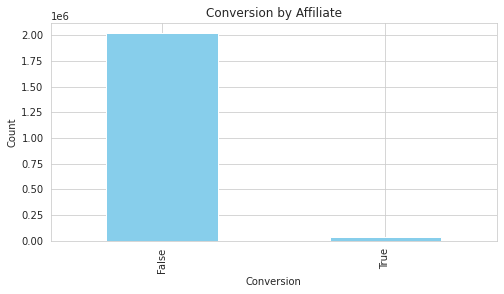

In [ ]:
ax = data.groupby('IsConverted').count()['Affiliate_Name__c'].plot(
    kind = 'bar', color='skyblue', grid=True, figsize=(8,4), title='Conversion by Affiliate'
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Count')
plt.show()

In [ ]:
# Calculate percentage of conversion
data.groupby('IsConverted').count()['Affiliate_Name__c']/data.shape[0]

IsConverted
False    0.981726
True     0.018274
Name: Affiliate_Name__c, dtype: float64

In [ ]:
#ENGAGEMENT RATE BY AFFILIATE

In [ ]:
by_offer_type_data = data.loc[
    data['IsConverted'] == 'Yes'
].groupby([
    'Affiliate_Name__c'
]).count()['Name']/data.groupby('Affiliate_Name__c').count()['Name']

by_offer_type_data.head()

Affiliate_Name__c
1 West Finance          NaN
1st Capital Financial   NaN
1st Capital Source      NaN
1st Shield              NaN
1st State Financing     NaN
Name: Name, dtype: float64

In [ ]:
# missing value occurring in the data
data.isnull().sum()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date

In [ ]:
# LEADS COUNT BY AFFILIATES
total_leads_count = data_clean['Affiliate_Name__c'].value_counts()
total_leads_count.head(50)

QuinStreet - C                          840848
Loanry - C                              515405
Lending Tree - C                        300844
Monevo - C                              125954
LoanCall.com - C                         74672
Credit Sesame - C                        39485
LoanME Organic                           38329
Leap Theory - C                          24532
LoanMePrime.com - C                      11827
Search ROI - C                            9917
Leads Zoom LLC - C                        8815
PingYo - C                                7544
Market Bullet                             7300
RoundSky - C                              6366
Mega Connect                              4775
StoreFront Lender - C                     3736
Google, Inc.                              3327
Liberty Tax Service                       2842
Discover Nimbus                           2162
IT Media - C                              2121
Intimate Interactive - C                  2087
Sanco_SROI   

In [ ]:
df_june = data_clean.loc[(data_clean['CreatedDate'] >= '6/1/2021') & (data_clean['CreatedDate'] <= '6/31/2021')]
df_june.head(2)

,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
942,New,7011U000000hSsaQAE,3184.0,6/2/2021 6:18:01 PM,2/15/1995 12:00:00 AM,False,taylorlhernandez0215@gmail.com,False,TAYLOR,HERNANDEZ,00Q1U00000TOgD7UAL,Pending Denial,5138166969,3000,5138166969,1000.0,OH,Rejected Lead,4685,QuinStreet - C,False,0,False,False
943,New,7011U000000hVf2QAE,3706.0,6/2/2021 6:18:07 PM,6/26/1983 12:00:00 AM,False,leaann83@gmail.com,False,LEA,BRACKENS,00Q1U00000TOgDCUA1,Pending Approval,2766203639,0,2766203639,2000.0,VA,Rejected Lead,5182,Loanry - C,False,0,False,False


In [ ]:
df_june.shape

(330140, 24)

In [ ]:
df_beforejune1 = data_clean.loc[(data_clean['CreatedDate'] <= '6/1/2021')]
df_beforejune1.head()

,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
0,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,Pending Denial,6063594267,0,8592673208,2000.0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False
1,New,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,Pending Denial,4073145448,4000,4073145448,2500.0,FL,Rejected Lead,4947,Monevo - C,False,0,False,False
2,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,Pending Approval,3027503090,10800,3027503090,1000.0,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False
3,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,SCHOSSR,00Q1U00000TMMhSUAX,Pending Denial,9282990559,0,9282990559,2000.0,AZ,Rejected Lead,5182,Loanry - C,False,0,False,False
4,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,False,jvalle0915@icloud.com,False,JOSEPH,VALLE,00Q1U00000TMMhWUAX,Pending Denial,6155468908,3000,6155468908,1000.0,TN,Rejected Lead,4685,QuinStreet - C,False,0,False,False


In [ ]:
df_beforejune1.shape

(814362, 24)

In [ ]:
df_beforejune1.info

In [ ]:
df_june.isnull().sum()

In [ ]:
df_june.groupby('IsConverted')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
IsConverted,,,,,,,,
False,323768.0,285.958424,1360.996144,0.0,0.0,0.0,0.0,100000.0
True,6372.0,5358.396579,13117.485579,0.0,1500.0,2600.0,3100.0,117800.0


In [ ]:
# June Conversion rate
percentage(6551,328616)

1.9935121844341115

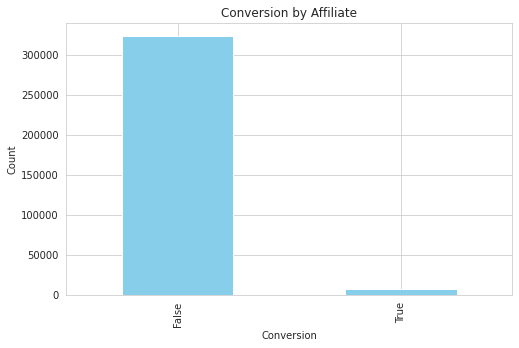

In [ ]:
df_june_plt = df_june.groupby('IsConverted').count()['Loan_Amount__c'].plot(
    kind = 'bar', color='skyblue', grid=True, figsize=(8,5), title='Conversion by Affiliate'
)
df_june_plt.set_xlabel('Conversion')
df_june_plt.set_ylabel('Count')
plt.show()

In [ ]:
df_may = data_clean.loc[(data_clean['CreatedDate'] >= '5/1/2021') & (data_clean['CreatedDate'] <= '5/31/2021')]
df_may.head(3)

,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
0,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,Pending Denial,6063594267,0,8592673208,2000.0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False
1,New,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,Pending Denial,4073145448,4000,4073145448,2500.0,FL,Rejected Lead,4947,Monevo - C,False,0,False,False
2,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,Pending Approval,3027503090,10800,3027503090,1000.0,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False


In [ ]:
df_may.groupby('IsConverted')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
IsConverted,,,,,,,,
False,347642.0,217.355780,1251.185291,0.0,0.0,0.0,0.0,100000.0
True,5679.0,4983.693256,11832.223272,0.0,1600.0,2620.0,3100.0,100000.0


In [ ]:
# May 2021 Conversion rate
percentage(5679,347642)

1.6335770706646495

In [ ]:
# APRIL 2021
df_april = data_clean.loc[(data_clean['CreatedDate'] >= '4/1/2021') & (data_clean['CreatedDate'] <= '4/30/2021')]
df_april.head(3)

,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
5483,New,7011U000000hSb0QAE,2094.0,4/24/2021 8:02:44 PM,6/5/1968 12:00:00 AM,False,r.mcneil1728@gmail.com,False,RENWICK,MCNEIL,00Q1U00000Sr90oUAB,Denied,NaN,8417,8035873955,5000.0,SC,Rejected Lead,4014,Lending Tree - C,False,0,False,False
5484,New,7011U000000hSSFQA2,1551.0,4/24/2021 8:03:35 PM,9/11/1978 12:00:00 AM,True,bgaytan649@gmail.com,False,JOSE,GAYTAN,00Q1U00000Sr90tUAB,Denied,NaN,60000,9517232333,NaN,Other,Duplicate,5471,Credit Sesame - C,False,0,False,False
5485,New,7011U000000hSb0QAE,2094.0,4/24/2021 8:04:12 PM,12/18/1992 12:00:00 AM,False,jeaneecanada@gmail.com,False,JEANEE,CANADA,00Q1U00000Sr913UAB,Denied,NaN,4667,4057060357,1000.0,OK,Rejected Lead,4014,Lending Tree - C,False,0,False,False


In [ ]:
df_april.groupby('IsConverted')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
IsConverted,,,,,,,,
False,255330.0,192.459860,1202.395840,0.0,0.0,0.0,0.0,100000.0
True,3989.0,5709.990724,13371.931406,0.0,1692.0,2800.0,3444.0,100000.0


In [ ]:
# April Conversion rate
percentage(3989,255330)

1.5622919359260565

In [ ]:
# MARCH 2021
df_march = data_clean.loc[(data_clean['CreatedDate'] >= '3/1/2021') & (data_clean['CreatedDate'] <= '3/31/2021')]
df_march.head(3)

,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall
12505,New,7011U000000hSl2QAE,2716.0,3/29/2021 11:12:13 AM,10/10/1991 12:00:00 AM,False,kierra.whitty@yahoo.com,False,KIERRA,WHITTY,00Q1U00000S6HnXUAV,Pending Denial,5862980717,1200,5862980717,2000.0,MI,Converted,4947,Monevo - C,False,1600,True,False
12506,New,7011U000000hSsaQAE,3184.0,3/29/2021 11:20:49 AM,6/26/1958 12:00:00 AM,True,billynbrendadotterweich@yahoo.com,False,BRENDA,DOTTERWEICH,00Q1U00000S6HnxUAF,Pending Approval,8126618016,3000,8126618016,1500.0,IN,Converted,4685,QuinStreet - C,False,1000,True,False
12507,New,7011U000000hSc5QAE,2161.0,3/29/2021 11:14:25 AM,5/5/1977 12:00:00 AM,False,cdgoad0505@live.com,False,CHRISTINA,GOAD,00Q1U00000S6HpOUAV,Pending Approval,9184404680,15000,9184404680,NaN,OK,Converted,4012,LoanCall.com - C,True,6000,True,False


In [ ]:
df_march.groupby('IsConverted')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
IsConverted,,,,,,,,
False,36321.0,2.257647,394.825244,0.0,0.0,0.0,0.0,75000.0
True,585.0,5299.651282,12013.212944,0.0,2000.0,2816.0,3300.0,100000.0


In [ ]:
# March percentage rate
percentage(585,36321)

1.6106384736103079

In [ ]:
# Total of loan with leads
loan_sum_june = df_june.groupby('Affiliate_Name__c').agg({
    'Loan_Amount__c': sum,
    'Id': lambda x: x.nunique()
})
loan_sum_june.columns = ['Loan Sum', 'Leads']

In [ ]:
data_clean['Date_of_Birth'] = pd.to_datetime(data_clean['Date_of_Birth_DOB__c'], errors='coerce')

In [ ]:
now = pd.to_datetime('now')
now
(now - data_clean['Date_of_Birth']).astype('<m8[Y]') 

0          23.0
1          44.0
2          59.0
3          60.0
4          23.0
           ... 
1567889    47.0
1567890    55.0
1567891    35.0
1567892    43.0
1567893    46.0
Name: Date_of_Birth, Length: 1567894, dtype: float64

In [ ]:
data_clean['Age'] = (now - data_clean['Date_of_Birth']).astype('<m8[Y]') 
data_clean.head()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c,Home_Owner,Opted_Out,Date_of_Birth,Age
0,410.0,JEREMIAH LAMBERT,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,6063594267,0,8592673208,0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1,1,1997-08-29,23.0
1,638.0,STEVE DEBOSE,New,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,4073145448,4000,4073145448,4000,FL,Rejected Lead,4947,Monevo - C,False,0,False,False,False,1,1,1976-11-26,44.0
2,NaN,MARSHA WILLIAMS,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,3027503090,10800,3027503090,10800,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False,False,1,1,1961-08-04,59.0
3,625.0,WILLIAM SCHOSSR,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,SCHOSSR,00Q1U00000TMMhSUAX,0051U000006PTLwQAO,Pending Denial,9282990559,0,9282990559,0,AZ,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1,1,1960-11-11,60.0
4,643.0,JOSEPH VALLE,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,False,jvalle0915@icloud.com,False,JOSEPH,VALLE,00Q1U00000TMMhWUAX,0051U000006PTLwQAO,Pending Denial,6155468908,3000,6155468908,3000,TN,Rejected Lead,4685,QuinStreet - C,False,0,False,False,False,1,1,1997-09-15,23.0


In [ ]:
data_clean.describe()

,Internal_Score__c,CampaignId__c,Monthly_Income__c,Requested_Loan_Amount__c,Loan_Amount__c,Home_Owner,Opted_Out,Age
count,985718.000000,1.567815e+06,1.567894e+06,1.567894e+06,1.567894e+06,1567894.0,1567894.0,1.558817e+06
mean,667.834221,3.174404e+03,5.597048e+03,5.597048e+03,3.367784e+02,1.0,1.0,4.193832e+01
std,73.386033,6.877824e+02,1.746555e+06,1.746555e+06,2.267843e+03,0.0,0.0,1.323291e+01
min,410.000000,1.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,-8.300000e+01
25%,632.000000,2.716000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,3.200000e+01
50%,667.000000,3.184000e+03,3.000000e+03,3.000000e+03,0.000000e+00,1.0,1.0,4.000000e+01
75%,706.000000,3.706000e+03,4.167000e+03,4.167000e+03,0.000000e+00,1.0,1.0,5.100000e+01
max,991.000000,5.680000e+03,2.133272e+09,2.133272e+09,2.000000e+05,1.0,1.0,2.440000e+02


In [ ]:
# select only loan amount not null
loan_sum_june = data_clean[data_clean['Loan_Amount__c'].notna()]
loan_sum_june.head()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c,Home_Owner,Opted_Out,Date_of_Birth,Age
0,410.0,JEREMIAH LAMBERT,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,6063594267,0,8592673208,0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1,1,1997-08-29,23.0
1,638.0,STEVE DEBOSE,New,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,4073145448,4000,4073145448,4000,FL,Rejected Lead,4947,Monevo - C,False,0,False,False,False,1,1,1976-11-26,44.0
2,NaN,MARSHA WILLIAMS,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,3027503090,10800,3027503090,10800,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False,False,1,1,1961-08-04,59.0
3,625.0,WILLIAM SCHOSSR,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,SCHOSSR,00Q1U00000TMMhSUAX,0051U000006PTLwQAO,Pending Denial,9282990559,0,9282990559,0,AZ,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1,1,1960-11-11,60.0
4,643.0,JOSEPH VALLE,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,False,jvalle0915@icloud.com,False,JOSEPH,VALLE,00Q1U00000TMMhWUAX,0051U000006PTLwQAO,Pending Denial,6155468908,3000,6155468908,3000,TN,Rejected Lead,4685,QuinStreet - C,False,0,False,False,False,1,1,1997-09-15,23.0


In [ ]:
loan_sum_june.isnull().sum()

In [ ]:
df_june.groupby(['Affiliate_Name__c','Name']).agg({
    'Loan_Amount__c': sum, 'CreatedDate': max
})

Loan_Amount__c            CreatedDate
Affiliate_Name__c           Name                                                   
1 West Finance              CHRISTINE TUOZO                0   6/14/2021 9:57:54 AM
1st Capital Source          NICHOLAS ROWELL            25000   6/28/2021 2:26:53 PM
4 Pillar Consulting LLC     SUZAN WOOTTON                  0  6/21/2021 11:00:10 AM
ADVENTURE FUNDING GROUP LLC GWENDOLYN FULLER           75000   6/16/2021 1:33:25 PM
                            MARK HECK                      0   6/21/2021 1:43:14 PM
...                                                      ...                    ...
singhs capital group        PAUL GOMES                     0   6/10/2021 9:03:13 AM
                            RICHARD EASLEY                 0   6/15/2021 1:49:04 PM
                            YEHIA FREEMAN                  0   6/15/2021 4:29:05 PM
werkwallet                  JOHN MCDOUGAN                  0  6/25/2021 10:56:39 AM
                            SCHOLAR JENKINS            75000  6/18/2021 10:23:45 AM

[263890 rows x 2 columns]

In [ ]:
loan_sum_june.groupby('IsConverted').count()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,DoNotCall,Mailer_Approved__c,Home_Owner,Opted_Out,Date_of_Birth,Age
IsConverted,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,957220,1539370,1539370,1539370,1539298,1539370,1530325,1539370,1538910,1539370,1539363,1539328,1539370,1539370,1539370,1157241,1539370,1506175,1539370,1538757,1539370,1539370,1539370,1539370,1539370,1539370,1539370,1539370,1539370,1530315,1530315
True,28498,28524,28524,28524,28517,28524,28502,28524,28524,28524,28524,28523,28524,28524,28524,17388,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524,28502,28502


In [ ]:
loan_sum_june.groupby('State__c').count()

In [ ]:
loan_sum_june.to_csv('/content/drive/MyDrive/loan_sum_june.csv', index=None)

In [ ]:
pd.DataFrame(data_clean.groupby(by='Age')['Loan_Amount__c'].sum())

In [ ]:
loan_sum_june.sort_values(by='Loan Sum', ascending=False).head(5)

In [ ]:
loan_sum_june.sort_values(by='Loan Sum', ascending=False).head(5)

In [ ]:
df_june.describe()

In [ ]:
data_clean.isnull().sum()

In [ ]:
data_clean.shape

(1494361, 28)

In [ ]:
data_affiliate_export = data_clean.groupby('Affiliate_Name__c').sum()
data_affiliate_export

In [ ]:
# data_good is a dataset which remove null mobile phone records - 373,330
data_good = data_clean[data_clean['MobilePhone'].notna()]
data_good.head()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
0,410.0,JEREMIAH LAMBERT,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,6063594267,0,8592673208,2000.0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False,False
1,638.0,STEVE DEBOSE,New,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,4073145448,4000,4073145448,2500.0,FL,Rejected Lead,4947,Monevo - C,False,0,False,False,False
2,NaN,MARSHA WILLIAMS,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,3027503090,10800,3027503090,1000.0,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False,False
3,625.0,WILLIAM SCHOSSR,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,SCHOSSR,00Q1U00000TMMhSUAX,0051U000006PTLwQAO,Pending Denial,9282990559,0,9282990559,2000.0,AZ,Rejected Lead,5182,Loanry - C,False,0,False,False,False
4,643.0,JOSEPH VALLE,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,False,jvalle0915@icloud.com,False,JOSEPH,VALLE,00Q1U00000TMMhWUAX,0051U000006PTLwQAO,Pending Denial,6155468908,3000,6155468908,1000.0,TN,Rejected Lead,4685,QuinStreet - C,False,0,False,False,False


In [ ]:
data_good.shape

(1174629, 28)

In [ ]:
1494361 - 1121031

373330

In [ ]:
data_good.plot(figsize=(15,5))

In [ ]:
data_good.isnull().sum()

In [ ]:
# Look at the general distribution of these features
data_good.describe()

,Internal_Score__c,CampaignId__c,Monthly_Income__c,Requested_Loan_Amount__c,Loan_Amount__c
count,710752.000000,1.174563e+06,1.174629e+06,1.108951e+06,1.174629e+06
mean,659.217095,3.311726e+03,3.835390e+03,2.169024e+03,2.067035e+02
std,67.410916,4.845232e+02,4.167006e+05,1.998149e+03,2.202678e+03
min,410.000000,1.009000e+03,0.000000e+00,1.000000e+01,0.000000e+00
25%,628.000000,3.184000e+03,0.000000e+00,1.000000e+03,0.000000e+00
50%,661.000000,3.184000e+03,3.000000e+03,2.000000e+03,0.000000e+00
75%,695.000000,3.706000e+03,4.167000e+03,2.000000e+03,0.000000e+00
max,991.000000,5.680000e+03,4.466670e+08,1.500000e+05,2.000000e+05


In [ ]:
# correlation matrix
data_good.corr()

,Internal_Score__c,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
Internal_Score__c,1.000000,-0.100490,0.039034,0.023593,0.004518,0.138053,0.220194,0.215464,0.213813,0.019503,0.001298
CampaignId__c,-0.100490,1.000000,0.000663,-0.004044,-0.005716,0.098513,-0.218769,-0.032326,-0.038148,-0.000610,0.004392
Dis_Other_Messaging__c,0.039034,0.000663,1.000000,0.002215,0.000044,0.010856,0.001499,0.190306,0.133568,0.002090,-0.000050
HasOptedOutOfEmail,0.023593,-0.004044,0.002215,1.000000,0.000003,0.006826,0.007488,0.008253,-0.001357,-0.000127,-0.000010
Monthly_Income__c,0.004518,-0.005716,0.000044,0.000003,1.000000,0.002190,0.002072,-0.000105,0.000032,0.000008,-0.000003
Requested_Loan_Amount__c,0.138053,0.098513,0.010856,0.006826,0.002190,1.000000,0.011234,0.215706,0.009807,0.004602,NaN
Is_Homeowner__c,0.220194,-0.218769,0.001499,0.007488,0.002072,0.011234,1.000000,0.051820,0.023214,0.003455,-0.000304
Loan_Amount__c,0.215464,-0.032326,0.190306,0.008253,-0.000105,0.215706,0.051820,1.000000,0.321204,0.009108,0.000835
IsConverted,0.213813,-0.038148,0.133568,-0.001357,0.000032,0.009807,0.023214,0.321204,1.000000,-0.001408,-0.000113
DoNotCall,0.019503,-0.000610,0.002090,-0.000127,0.000008,0.004602,0.003455,0.009108,-0.001408,1.000000,-0.000011


In [ ]:
# Summary of statistics for Conversion rate with Loan amount
data_good.groupby('IsConverted')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
IsConverted,,,,,,,,
False,1157241.0,119.978558,984.212473,0.0,0.0,0.0,0.0,100000.0
True,17388.0,5978.596676,15148.805041,0.0,1500.0,2500.0,3000.0,200000.0


In [ ]:
percentage(19538,1101493)

1.7737743226693223

In [ ]:
# Summary of statistics for Conversion rate with Requested Loan amount
data_clean.groupby('IsConverted')['Requested_Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
IsConverted,,,,,,,,
False,1358765.0,2573.261172,2591.662129,1.0,1000.0,2000.0,2500.0,150000.0
True,23650.0,2781.812685,2791.844220,100.0,1000.0,2000.0,4000.0,100000.0


In [ ]:
percentage(23650,1358765)

1.740551162268678

In [ ]:
# # Summary of statistics for Conversion rate with Homeowner rate
data_clean.groupby('Is_Homeowner__c')['Requested_Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
Is_Homeowner__c,,,,,,,,
False,1272905.0,2526.545331,2445.549261,10.0,1300.0,2000.0,2500.0,100000.0
True,109510.0,3161.308575,3891.369161,1.0,1000.0,2000.0,4000.0,150000.0


In [ ]:
percentage(109510,1272905)

8.603155773604472

In [ ]:
# check Conversion rate with other variables
data_clean.groupby('IsConverted').mean()

,Internal_Score__c,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Is_Homeowner__c,Loan_Amount__c,DoNotCall,Mailer_Approved__c
IsConverted,,,,,,,,,,
False,664.919135,3182.466313,0.025287,0.000216,4223.124723,2573.261172,0.089296,243.763510,0.000189,0.000004
True,754.138420,3027.309255,0.196909,0.000031,4751.619373,2781.812685,0.163603,4995.707517,0.000000,0.000000


In [ ]:
# check Home owner statistics with other variables
data_clean.groupby('Is_Homeowner__c').mean()

,Internal_Score__c,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
Is_Homeowner__c,,,,,,,,,,
False,663.639383,3201.663992,0.029215,0.000173,5493.816196,2536.802977,277.830881,0.01683,0.000172,0.000006
True,748.542011,2909.962488,0.022414,0.000478,6598.529465,3130.071151,908.647071,0.03141,0.000287,0.000014


In [ ]:
data_clean.groupby('Campaign__c').mean()

,Internal_Score__c,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
Campaign__c,,,,,,,,,,,
7011U000000Jeh7QAC,NaN,3820.000000,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0
7011U000000JeuaQAC,757.333333,3828.000000,0.192308,0.0,0.000000,NaN,0.076923,14623.076923,0.538462,0.000000,0.0
7011U000000JfCoQAK,638.791667,3832.000000,0.000000,0.0,3940.825203,NaN,0.455285,10.162602,0.004065,0.000000,0.0
7011U000000JfbjQAC,762.583333,3836.000000,0.075000,0.0,0.000000,NaN,0.250000,21925.000000,0.550000,0.000000,0.0
7011U000000JfdfQAC,653.063898,3836.910324,0.008056,0.0,5995.513462,1792.770829,0.391562,38.867925,0.001696,0.000212,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7011U000000hWZ7QAM,NaN,3774.000000,0.000000,0.0,6500.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0
7011U000000hWZ8QAM,NaN,3775.000000,1.000000,0.0,10000.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0
7011U000000hX4ZQAU,661.661972,3791.781148,0.007584,0.0,4059.916576,2750.595883,0.390033,41.495125,0.000000,0.001083,0.0


In [ ]:
data_clean.groupby('Is_Homeowner__c').count()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
Is_Homeowner__c,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,937016,1421380,1421380,1421380,1421301,1421380,1412329,1421380,1420934,1421380,1421373,1421341,1421380,1421380,1421380,1059787,1421380,1394303,1330505,1420773,1421380,1421380,1421380,1421380,1421380,1421380,1421380
True,48702,146514,146514,146514,146514,146514,146498,146514,146500,146514,146514,146510,146514,146514,146514,114842,146514,140396,119337,146508,146514,146514,146514,146514,146514,146514,146514


In [ ]:
percentage(146514,1421380)

10.307869816657051

In [ ]:
data_clean.groupby('State__c').count()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
State__c,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,21,35,35,35,35,35,31,35,35,35,35,35,35,35,22,35,31,35,35,35,35,35,35,35,35,35
AL,75,196,196,196,196,196,126,196,196,196,196,196,196,196,149,196,171,196,196,196,196,196,196,196,196,196
AR,19,80,80,80,80,80,60,80,79,80,80,80,80,80,57,80,61,80,80,80,80,80,80,80,80,80
AZ,54385,86583,86583,86583,86583,86583,86500,86583,86571,86583,86583,86582,86583,86583,64311,86583,84873,86583,86583,86583,86583,86583,86583,86583,86583,86583
CA,27119,33592,33592,33592,33591,33592,33124,33592,33524,33592,33592,33591,33592,33592,10396,33592,30934,33592,33592,33592,33592,33592,33592,33592,33592,33592
CO,24,99,99,99,99,99,66,99,99,99,99,99,99,99,58,99,70,99,99,99,99,99,99,99,99,99
CT,14,57,57,57,56,57,45,57,57,57,57,57,57,57,46,57,53,57,57,57,57,57,57,57,57,57
DC,3,15,15,15,15,15,4,15,15,15,15,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15
DE,8036,13337,13337,13337,13336,13337,13317,13337,13335,13337,13337,13337,13337,13337,10056,13337,13078,13337,13337,13337,13337,13337,13337,13337,13337,13337


In [ ]:
data_clean['HasOptedOutOfEmail'].value_counts()

False    1567578
True         316
Name: HasOptedOutOfEmail, dtype: int64

In [ ]:
data_clean['Is_Homeowner__c'].value_counts()

False    1421380
True      146514
Name: Is_Homeowner__c, dtype: int64

In [ ]:
# Percentage of Homeowner
percentage(146514, 1421380)

10.307869816657051

In [ ]:
data_clean['Home_Owner'] = np.where(data_clean['Is_Homeowner__c'].isnull(),0,1)
data_clean.head()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c,Home_Owner
0,410.0,JEREMIAH LAMBERT,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,6063594267,0,8592673208,0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1
1,638.0,STEVE DEBOSE,New,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,4073145448,4000,4073145448,4000,FL,Rejected Lead,4947,Monevo - C,False,0,False,False,False,1
2,NaN,MARSHA WILLIAMS,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,3027503090,10800,3027503090,10800,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False,False,1
3,625.0,WILLIAM SCHOSSR,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,SCHOSSR,00Q1U00000TMMhSUAX,0051U000006PTLwQAO,Pending Denial,9282990559,0,9282990559,0,AZ,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1
4,643.0,JOSEPH VALLE,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,False,jvalle0915@icloud.com,False,JOSEPH,VALLE,00Q1U00000TMMhWUAX,0051U000006PTLwQAO,Pending Denial,6155468908,3000,6155468908,3000,TN,Rejected Lead,4685,QuinStreet - C,False,0,False,False,False,1


In [ ]:
data_clean['Opted_Out'] = np.where(data_clean['HasOptedOutOfEmail'].isnull(),0,1)
data_clean.head()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c,Home_Owner,Opted_Out
0,410.0,JEREMIAH LAMBERT,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,6063594267,0,8592673208,0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1,1
1,638.0,STEVE DEBOSE,New,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,4073145448,4000,4073145448,4000,FL,Rejected Lead,4947,Monevo - C,False,0,False,False,False,1,1
2,NaN,MARSHA WILLIAMS,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,3027503090,10800,3027503090,10800,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False,False,1,1
3,625.0,WILLIAM SCHOSSR,New,7011U000000hVf2QAE,3706.0,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,SCHOSSR,00Q1U00000TMMhSUAX,0051U000006PTLwQAO,Pending Denial,9282990559,0,9282990559,0,AZ,Rejected Lead,5182,Loanry - C,False,0,False,False,False,1,1
4,643.0,JOSEPH VALLE,New,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,False,jvalle0915@icloud.com,False,JOSEPH,VALLE,00Q1U00000TMMhWUAX,0051U000006PTLwQAO,Pending Denial,6155468908,3000,6155468908,3000,TN,Rejected Lead,4685,QuinStreet - C,False,0,False,False,False,1,1


In [ ]:
data_one = pd.read_csv('/content/drive/MyDrive/7-26-2021-All-Leads-BK.csv', usecols=['Is_Homeowner__c', 'CampaignId__c',	'Monthly_Income__c',	'Requested_Loan_Amount__c',	'Loan_Amount__c'])
data_one.head()

,CampaignId__c,Monthly_Income__c,Requested_Loan_Amount__c,Is_Homeowner__c,Loan_Amount__c
0,3706.0,0,2000.0,False,0
1,2716.0,4000,2500.0,False,0
2,3184.0,10800,1000.0,True,0
3,3706.0,0,2000.0,False,0
4,3184.0,3000,1000.0,False,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
# Generate categorical plots for ordinal features
for col in ['Loan_Amount__c']:
    sns.catplot(x=col, y='Monthly_Income__c', data=data_one, hue="Is_Homeowner__c", height=5, aspect=.8)

In [ ]:
data_clean.dtypes

In [ ]:
data_clean.groupby(['Is_Homeowner__c']).mean()

,Internal_Score__c,AnnualRevenue,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c,State_Code
Is_Homeowner__c,,,,,,,,,,,,
False,663.684363,NaN,3206.219300,0.029433,0.000182,3999.420186,2526.545331,282.997979,0.019557,0.000174,0.000004,NaN
True,748.538165,NaN,2908.570128,0.023954,0.000515,6584.699354,3161.308575,962.814722,0.038269,0.000295,0.000007,NaN


In [ ]:
data_clean["Requested_Loan_Amount__c"] = data_clean["Monthly_Income__c"].astype(str).astype(int)
print(data_clean.dtypes)

In [ ]:
data_clean.shape

(1567894, 28)

In [ ]:
# groupby Affiliate
grouped_affiliate = data_clean.groupby('Affiliate_Name__c').agg({'Loan_Amount__c': ['mean','min','max']})
print(grouped_affiliate)

                          Loan_Amount__c                
                                    mean     min     max
Affiliate_Name__c                                       
1 West Finance              17642.857143       0   75000
1st Capital Financial       11500.000000   11500   11500
1st Capital Source          10000.000000       0   25000
1st Shield                  16666.666667       0   50000
1st State Financing             0.000000       0       0
...                                  ...     ...     ...
iServices Inc.                  0.000000       0       0
merchant funding partners       0.000000       0       0
mpb capital consulting     100000.000000  100000  100000
singhs capital group         4144.680851       0  100000
werkwallet                  21384.615385       0  100000

[448 rows x 3 columns]


In [ ]:
# groupby State
grouped_affiliate = data_clean.groupby('State__c').agg({'Loan_Amount__c': ['mean','min','max']})
print(grouped_affiliate)

         Loan_Amount__c            
                   mean min     max
State__c                           
AK         35925.641026   0  100000
AL          8313.567839   0  100000
AR          5087.058824   0  100000
AZ           420.661696   0  100000
CA          2200.895423   0  140000
CO          6656.310680   0  100000
CT          9482.758621   0  100000
DC             0.000000   0       0
DE           437.173418   0  120000
FL           316.271375   0  100000
GA          9774.713528   0  100000
HI          7708.333333   0   70000
IA         14332.786885   0  150000
ID           422.074598   0  100000
IL          1786.375592   0  117800
IN           208.309365   0  200000
KS          6889.655172   0  100000
KY           195.893999   0  100000
LA          7796.666667   0  100000
MA          7382.222222   0  100000
MD          9309.090909   0  100000
ME         11052.631579   0  100000
MI           241.302866   0  100000
MN           314.638015   0  100000
MO           321.485060   0 

In [ ]:
data_clean.groupby('State__c').count()

,Internal_Score__c,Name,Borrower_Type__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Agent__c,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
State__c,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,25,39,39,39,39,39,35,39,39,39,39,39,39,39,39,22,39,35,8,39,39,39,39,39,39,39,39
AL,76,199,199,199,199,199,128,199,199,199,199,199,199,199,199,152,199,174,36,199,199,199,199,199,199,199,199
AR,19,85,85,85,85,85,63,85,84,85,85,85,85,85,85,60,85,66,38,85,85,85,85,85,85,85,85
AZ,56443,90726,90726,90726,90726,90726,90636,90726,90714,90726,90726,90725,90726,90726,90726,67097,90726,89004,86035,90726,90726,90726,90726,90726,90726,90726,90726
CA,28406,35371,35371,35371,35370,35371,34854,35371,35299,35371,35371,35369,35371,35371,35371,11040,35371,32712,24671,35371,35371,35371,35371,35371,35371,35371,35371
CO,26,103,103,103,103,103,70,103,103,103,103,103,103,103,103,62,103,74,32,103,103,103,103,103,103,103,103
CT,14,58,58,58,57,58,45,58,58,58,58,58,58,58,58,47,58,54,27,58,58,58,58,58,58,58,58
DC,3,15,15,15,15,15,4,15,15,15,15,15,15,15,15,13,15,15,1,15,15,15,15,15,15,15,15
DE,8327,14047,14047,14047,14046,14047,14027,14047,14045,14047,14047,14047,14047,14047,14047,10609,14047,13787,13176,14047,14047,14047,14047,14047,14047,14047,14047


In [ ]:
# groupby Affiliate
grouped_affiliate = data_clean.groupby('Affiliate_Name__c').agg({'Loan_Amount__c': ['mean','min','max']})
print(grouped_affiliate)

                          Loan_Amount__c                
                                    mean     min     max
Affiliate_Name__c                                       
1 West Finance              18296.296296       0   75000
1st Capital Financial       11500.000000   11500   11500
1st Capital Source          10000.000000       0   25000
1st Shield                  16666.666667       0   50000
1st State Financing             0.000000       0       0
...                                  ...     ...     ...
iServices Inc.                  0.000000       0       0
merchant funding partners       0.000000       0       0
mpb capital consulting     100000.000000  100000  100000
singhs capital group         4144.680851       0  100000
werkwallet                  14500.000000       0   75000

[438 rows x 3 columns]


In [ ]:
grouped_affiliate.T

Affiliate_Name__c    1 West Finance  ...  werkwallet
Loan_Amount__c mean    18296.296296  ...     14500.0
               min         0.000000  ...         0.0
               max     75000.000000  ...     75000.0

[3 rows x 438 columns]

In [ ]:
data_clean.dtypes

In [ ]:
# Export to Excel
grouped_affiliate.to_excel(r'C:\Users\howard.nguyen\Documents\7-20-2021-Affiliate-LAM.xlsx', sheet_name='Affiliates-loan amount', index=True)

In [ ]:
# groupby Homeowner
grouped_homeowner = data_clean.groupby('Is_Homeowner__c').agg({'Loan_Amount__c': ['mean','min','max']})
print(grouped_homeowner)

                Loan_Amount__c            
                          mean min     max
Is_Homeowner__c                           
False               282.997979   0  200000
True                962.814722   0  200000


In [ ]:
grouped_income = data_clean.groupby('Monthly_Income__c').agg({'Requested_Loan_Amount__c': ['mean', 'min', 'max']})
print(grouped_income)

                  Requested_Loan_Amount__c                  
                                      mean      min      max
Monthly_Income__c                                           
0                              2001.298570      1.0  30000.0
1                              3071.428571   1000.0  11000.0
2                              4400.000000    500.0  15000.0
3                              3025.000000   2000.0   5100.0
4                              8210.000000    600.0  25000.0
...                                    ...      ...      ...
65007000                       3000.000000   3000.0   3000.0
68947820                      11000.000000  11000.0  11000.0
70457070                       1000.000000   1000.0   1000.0
75005838                       1000.000000   1000.0   1000.0
446667023                      3000.000000   3000.0   3000.0

[10175 rows x 3 columns]


In [ ]:
grouped_income.columns = ['Requested_Loan_Amount__c_mean','Requested_Loan_Amount__c_min','Requested_Loan_Amount__c_max']
grouped_income = grouped_income.reset_index()
print(grouped_income)

       Monthly_Income__c  ...  Requested_Loan_Amount__c_max
0                      0  ...                       30000.0
1                      1  ...                       11000.0
2                      2  ...                       15000.0
3                      3  ...                        5100.0
4                      4  ...                       25000.0
...                  ...  ...                           ...
10170           65007000  ...                        3000.0
10171           68947820  ...                       11000.0
10172           70457070  ...                        1000.0
10173           75005838  ...                        1000.0
10174          446667023  ...                        3000.0

[10175 rows x 4 columns]


In [ ]:
grouped_income_multiple = data_clean.groupby(['Monthly_Income__c','Name']).agg({'Monthly_Income__c': ['mean','min','max']})
grouped_income_multiple.columns = ['Requested_Loan_Amount__c_mean','Requested_Loan_Amount__c_min','Requested_Loan_Amount__c_max']
grouped_income_multiple = grouped_income_multiple.reset_index()
print(grouped_income_multiple)

         Monthly_Income__c  ... Requested_Loan_Amount__c_max
0                        0  ...                            0
1                        0  ...                            0
2                        0  ...                            0
3                        0  ...                            0
4                        0  ...                            0
...                    ...  ...                          ...
1042283           65007000  ...                     65007000
1042284           68947820  ...                     68947820
1042285           70457070  ...                     70457070
1042286           75005838  ...                     75005838
1042287          446667023  ...                    446667023

[1042288 rows x 5 columns]


In [ ]:
data_clean.corr()

,CampaignId__c,Dis_Other_Messaging__c,HasOptedOutOfEmail,Monthly_Income__c,Requested_Loan_Amount__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,Mailer_Approved__c
CampaignId__c,1.000000,-0.053532,-0.004337,-0.004509,-0.115773,-0.124084,-0.072663,-0.033814,-0.005733,0.006622
Dis_Other_Messaging__c,-0.053532,1.000000,0.015972,0.000876,0.017190,-0.008830,0.096750,0.146767,0.002536,0.001906
HasOptedOutOfEmail,-0.004337,0.015972,1.000000,0.000019,0.012320,0.006802,0.012491,-0.001840,0.003248,-0.000027
Monthly_Income__c,-0.004509,0.000876,0.000019,1.000000,0.003112,0.001828,0.001012,0.000181,-0.000004,-0.000005
Requested_Loan_Amount__c,-0.115773,0.017190,0.012320,0.003112,1.000000,0.065109,0.350444,0.010018,0.008239,NaN
Is_Homeowner__c,-0.124084,-0.008830,0.006802,0.001828,0.065109,1.000000,0.085287,0.037874,0.002650,0.000713
Loan_Amount__c,-0.072663,0.096750,0.012491,0.001012,0.350444,0.085287,1.000000,0.297879,0.012236,0.000790
IsConverted,-0.033814,0.146767,-0.001840,0.000181,0.010018,0.037874,0.297879,1.000000,-0.001995,-0.000273
DoNotCall,-0.005733,0.002536,0.003248,-0.000004,0.008239,0.002650,0.012236,-0.001995,1.000000,-0.000025
Mailer_Approved__c,0.006622,0.001906,-0.000027,-0.000005,NaN,0.000713,0.000790,-0.000273,-0.000025,1.000000


In [ ]:
# returns object containing counts of unique values.
data_clean['Email'].value_counts()

noemail@loanme.com            5742
randyjones447@gmail.com        105
melaniecollins87@yahoo.com     103
carolw76@hotmail.com            84
licaattiqrauuy@gmail.com        74
                              ... 
tonyhankins50@gmail.com          1
rarataha14@gmail.com             1
trav_usaf@yahoo.com              1
jnique961@gmail.com              1
matthel1015@gmail.com            1
Name: Email, Length: 746124, dtype: int64

In [ ]:
# Read in Data
from scipy import stats

In [ ]:
cat_feat = ['IndividualId','MasterRecordId','Highest_Step__c']
cat_feat

['IndividualId', 'MasterRecordId', 'Highest_Step__c']

In [ ]:
data.drop(cat_feat, axis=1, inplace=True)
data.head()

,Internal_Score__c,SBLManager_Lookup__c,Name,AnnualRevenue,Borrower_Type__c,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,ConvertedAccountId,ConvertedContactId,ConvertedOpportunityId,CreatedById,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastModifiedById,LastName,Id,Loan_Agent__c,Loan_Status__c,MiddleName,MobilePhone,Monthly_Income__c,OwnerId,PartnerAccountId,Phone,Pricing_Version__c,RecordTypeId,Requested_Loan_Amount__c,Selected_Product__c,SSN_Verification__c,State__c,Status,Preferred_Language__c,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Loan_Partner__c,Mailer_Approved__c
0,741.0,NaN,GASTON MAHOLO,NaN,New,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,0011U00001lXS4nQAG,0031U00001l0Ey7QAE,0061U00000MRfmnQAD,0051U000006PGsoQAG,5/24/2021 11:49:34 AM,7/24/1967 12:00:00 AM,False,gastonmaholo@yahoo.fr,False,GASTON,0051U000006PeXQQA0,MAHOLO,00Q1U00000TMMhJUAX,0051U000006PeXQQA0,Pending Approval,NaN,6128066447,5000,0051U000006PeXQQA0,NaN,6128066447,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2000.0,a0j1U00000fuJYWQA2,NaN,MN,Converted,NaN,5182,Loanry - C,False,NaN,NaN,2800,True,False,CC Bank,False
1,410.0,NaN,JEREMIAH LAMBERT,NaN,New,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,0051U000006PGsoQAG,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,NaN,6063594267,0,0051U000006PTLwQAO,NaN,8592673208,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2000.0,NaN,a1o1U000003HVB6QAO,KY,Rejected Lead,NaN,5182,Loanry - C,False,NaN,NaN,0,False,False,NaN,False
2,638.0,NaN,STEVE DEBOSE,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSl2QAE,2716.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,0051U000006PGsoQAG,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,NaN,4073145448,4000,0051U000006PTLwQAO,NaN,4073145448,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2500.0,NaN,a1o1U000003ODjcQAG,FL,Rejected Lead,NaN,4947,Monevo - C,False,NaN,NaN,0,False,False,NaN,False
3,NaN,NaN,MARSHA WILLIAMS,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSsaQAE,3184.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,0051U000006PGsoQAG,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,NaN,3027503090,10800,0051U000006PTLwQAO,NaN,3027503090,a1k1U000002KiGUQA0,0121U000000jV0pQAE,1000.0,NaN,a1o1U000003O01bQAC,DE,Rejected Lead,NaN,4685,QuinStreet - C,True,NaN,NaN,0,False,False,NaN,False
4,625.0,NaN,WILLIAM SCHOSSR,NaN,New,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,0051U000007j2oMQAQ,SCHOSSR,00Q1U00000TMMhSUAX,0051U000006PTLwQAO,Pending Denial,NaN,9282990559,0,0051U000006PTLwQAO,NaN,9282990559,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2000.0,NaN,NaN,AZ,Rejected Lead,NaN,5182,Loanry - C,False,NaN,NaN,0,False,False,NaN,False


In [ ]:
data.corr()

In [ ]:
data.groupby('Loan_Amount__c')['Internal_Score__c'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Amount__c,,,,,,,,
0,805606.0,650.904973,64.059476,410.0,626.00,657.0,687.00,983.0
500,442.0,652.699095,35.705046,410.0,631.00,652.5,675.75,780.0
600,1043.0,715.361457,37.291001,410.0,691.00,707.0,731.00,910.0
602,1.0,776.000000,NaN,776.0,776.00,776.0,776.00,776.0
606,4.0,729.750000,35.984951,690.0,705.75,729.5,753.50,770.0
...,...,...,...,...,...,...,...,...
136500,1.0,870.000000,NaN,870.0,870.00,870.0,870.00,870.0
140000,4.0,785.250000,54.322340,705.0,776.25,806.5,815.50,823.0
145000,1.0,800.000000,NaN,800.0,800.00,800.0,800.00,800.0


In [ ]:
data_clean.pivot_table('IsConverted', index='Is_Homeowner__c', columns='Loan_Status__c', aggfunc='count')

Loan_Status__c,Denied,Pending Approval,Pending Denial
Is_Homeowner__c,,,
False,200375,486131,672054
True,22781,94942,18078


In [ ]:
data_clean.pivot_table('Is_Homeowner__c', index='IsConverted', columns='Affiliate_Name__c', aggfunc='count')

Affiliate_Name__c,1 West Finance,1st Capital Financial,1st Capital Source,1st Shield,1st State Financing,365 Business Funding,4 Pillar Consulting LLC,ADVENTURE FUNDING GROUP LLC,AFG Funding,ALL CREDIT FUNDING LLC,AMS Funding Direct,AR Cap Group,ATYG LLC,Adam Wines Consulting,Advance My Business,Advanced Capital Resource,Affinity Beyond Capital,Affinity Member Services,Affluent business capital,Alamo Funding,Alburton LLC,All Finance Funding,Allison Capital,Ally Business Funding,American Business Funders,American Capital Group,American Funding Now LLC,Americapital Group LLC,Amerifi Capital Group LLC,Ardent Fund,Ask Zalman,Assurance 832,Axxess Finance,B&S Consulting Group LLC,BAKER SOLUTIONS INC,BANK XYZ FINANCIAL SERVICES LLC,BEACH BUSINESS FUNDING INC,BF Advance LLC,BLACK IRON CAPITAL,BTH Capital LLC,...,United Business Funds,United Capital Source,United Cash Solutions,United Funding Solutions,Univision - C,Unlimited Financial Funding,Upcrunch,Upfront Capital Inc,Uplyft Capital,Upperline Capital,Upwise Capital,VIP Capital Funding,VLS Funding,VP Credit Services,Vantage Cap group,Versa Business Systems,Viribus Capital Group,Vital Funding Solutions,WCP,WOLF BUSINESS SOLUTIONS INC.,WalletHub,We Fund,"WeFund, LLC","Wheaten Financial, Inc.",Wisco Capital,Working Financial Solutions,World Trinity Funding,Worldwide Capital & Trust,Yelp - C,ZOOMANALYTICS-C,Zimco Financial Group,bullseye capital solutions,core rock capital,first union lending,iAdvanceNow,iServices Inc.,merchant funding partners,mpb capital consulting,singhs capital group,werkwallet
IsConverted,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,19.0,NaN,2.0,1.0,3.0,1.0,1.0,21.0,12.0,6.0,2.0,26.0,1.0,15.0,18.0,3.0,7.0,2.0,12.0,1.0,1.0,1.0,9.0,1.0,NaN,7.0,6.0,1.0,17.0,NaN,3.0,1.0,1.0,9.0,NaN,1.0,4.0,26.0,1.0,2.0,...,3.0,17.0,1.0,7.0,2.0,1.0,1.0,2.0,12.0,1.0,19.0,3.0,NaN,1.0,18.0,2.0,1.0,1.0,NaN,11.0,935.0,13.0,20.0,NaN,17.0,11.0,1.0,4.0,11.0,358.0,1.0,NaN,3.0,19.0,8.0,2.0,4.0,NaN,44.0,8.0
True,8.0,1.0,3.0,2.0,NaN,NaN,NaN,8.0,3.0,4.0,NaN,6.0,1.0,4.0,10.0,1.0,1.0,2.0,14.0,1.0,NaN,NaN,6.0,1.0,1.0,7.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,15.0,NaN,1.0,...,NaN,20.0,6.0,1.0,NaN,1.0,NaN,1.0,17.0,NaN,2.0,1.0,3.0,1.0,22.0,2.0,1.0,1.0,1.0,4.0,24.0,11.0,1.0,3.0,5.0,3.0,3.0,NaN,NaN,85.0,NaN,2.0,1.0,14.0,2.0,NaN,1.0,1.0,3.0,6.0


In [ ]:
data.describe()

,Internal_Score__c,AnnualRevenue,Business_History_Months__c,Business_Monthly_Revenue__c,CampaignId__c,IndividualId,MasterRecordId,Monthly_Income__c,Requested_Loan_Amount__c,Loan_Amount__c,Highest_Step__c,Sanco_Lead_Id__c,State_Code
count,903584.000000,0.0,3223.000000,3.466000e+03,1.427808e+06,0.0,0.0,1.427881e+06,1.322918e+06,1.427881e+06,0.0,7.820000e+02,0.0
mean,667.642548,NaN,92.303444,4.231879e+04,3.188082e+03,NaN,NaN,4.226761e+03,2.561341e+03,3.411185e+02,NaN,8.421515e+06,NaN
std,73.507346,NaN,129.523444,1.397132e+05,6.878323e+02,NaN,NaN,4.023014e+05,2.563102e+03,2.301335e+03,NaN,4.089220e+02,NaN
min,410.000000,NaN,0.000000,0.000000e+00,1.009000e+03,NaN,NaN,0.000000e+00,1.000000e+00,0.000000e+00,NaN,8.420770e+06,NaN
25%,632.000000,NaN,22.000000,1.000000e+04,3.104000e+03,NaN,NaN,0.000000e+00,1.000000e+03,0.000000e+00,NaN,8.421172e+06,NaN
50%,667.000000,NaN,47.000000,1.500000e+04,3.184000e+03,NaN,NaN,3.000000e+03,2.000000e+03,0.000000e+00,NaN,8.421511e+06,NaN
75%,706.000000,NaN,109.500000,4.200000e+04,3.706000e+03,NaN,NaN,4.167000e+03,2.500000e+03,0.000000e+00,NaN,8.421886e+06,NaN
max,991.000000,NaN,1418.000000,7.000000e+06,5.654000e+03,NaN,NaN,4.466670e+08,1.500000e+05,2.000000e+05,NaN,8.422216e+06,NaN


In [ ]:
data.columns

In [ ]:
# 2 Selecting/Ignoring particular columns
data_seven_columns = ['Name','Loan_Status__c','Email','MobilePhone','Phone','Affiliate_Name__c','Affiliate_ID_Number__c']
wanted = ['Name','Loan_Status__c','Email','MobilePhone','Phone','Affiliate_Name__c','Affiliate_ID_Number__c']
subdata = data[wanted]
subdata.head()

,Name,Loan_Status__c,Email,MobilePhone,Phone,Affiliate_Name__c,Affiliate_ID_Number__c
0,GASTON MAHOLO,Pending Approval,gastonmaholo@yahoo.fr,6128066447,6128066447,Loanry - C,5182
1,JEREMIAH LAMBERT,Pending Denial,maldonadoiris035@gmail.com,6063594267,8592673208,Loanry - C,5182
2,STEVE DEBOSE,Pending Denial,debose34@gmail.com,4073145448,4073145448,Monevo - C,4947
3,MARSHA WILLIAMS,Pending Approval,mwilliams0804@gmail.com,3027503090,3027503090,QuinStreet - C,4685
4,WILLIAM SCHOSSR,Pending Denial,butchwalkaboutschosser@gmail.com,9282990559,9282990559,Loanry - C,5182


In [ ]:
subdata.shape

(1445565, 7)

In [ ]:
data.groupby('Email').mean()

In [ ]:
column_list = data.columns.values.tolist()
sublist = [i for i in column_list if i not in wanted]
subdata = data[sublist]
subdata.head()

In [ ]:
# Explore the number of unique values for each feature
for col in data.columns:
  print('{}: {} unique values'.format(col, data[col].nunique()))

In [ ]:
data['MobilePhone'].describe()

count        1087346
unique        542082
top       5862925183
freq              81
Name: MobilePhone, dtype: object

In [ ]:
data['Phone'].describe()

count        1395222
unique        689971
top       9999999999
freq             647
Name: Phone, dtype: object

In [ ]:
df = pd.DataFrame(data, columns = ['Name', 'Phone', 'MobilePhone', 'Email'])
# check duplicate rows based on Email
duplicate = df[df.duplicated('Email')]
print("Duplicate Rows based on Email:")
duplicate

NameError: ignored

In [ ]:
 n  

In [ ]:
# data['Phone'].dropna()

0          6128066447
1          8592673208
2          4073145448
3          3027503090
4          9282990559
              ...    
1427876    8122299668
1427877    6628163416
1427878    5202279921
1427879    3304150979
1427880    5132668142
Name: Phone, Length: 1395222, dtype: object

In [ ]:
data.describe()

,Internal_Score__c,AnnualRevenue,Business_History_Months__c,Business_Monthly_Revenue__c,CampaignId__c,IndividualId,MasterRecordId,Monthly_Income__c,Requested_Loan_Amount__c,Loan_Amount__c,Highest_Step__c,Sanco_Lead_Id__c,State_Code
count,916389.000000,0.0,3282.000000,3.522000e+03,1.445492e+06,0.0,0.0,1.445565e+06,1.338946e+06,1.445565e+06,0.0,7.820000e+02,0.0
mean,667.699980,NaN,91.921085,4.255482e+04,3.186323e+03,NaN,NaN,4.227511e+03,2.563297e+03,3.421043e+02,NaN,8.421515e+06,NaN
std,73.454408,NaN,128.637206,1.395073e+05,6.871360e+02,NaN,NaN,3.998527e+05,2.568698e+03,2.301554e+03,NaN,4.089220e+02,NaN
min,410.000000,NaN,0.000000,0.000000e+00,1.009000e+03,NaN,NaN,0.000000e+00,1.000000e+00,0.000000e+00,NaN,8.420770e+06,NaN
25%,632.000000,NaN,22.000000,1.000000e+04,3.104000e+03,NaN,NaN,0.000000e+00,1.000000e+03,0.000000e+00,NaN,8.421172e+06,NaN
50%,667.000000,NaN,47.000000,1.500000e+04,3.184000e+03,NaN,NaN,3.000000e+03,2.000000e+03,0.000000e+00,NaN,8.421511e+06,NaN
75%,706.000000,NaN,110.750000,4.200000e+04,3.706000e+03,NaN,NaN,4.167000e+03,2.500000e+03,0.000000e+00,NaN,8.421886e+06,NaN
max,991.000000,NaN,1418.000000,7.000000e+06,5.664000e+03,NaN,NaN,4.466670e+08,1.500000e+05,2.000000e+05,NaN,8.422216e+06,NaN


In [ ]:
data.shape

(1445565, 58)

In [ ]:
data1 = data['Affiliate_Name__c']=='Loanr - C'
data1.head()

0    False
1    False
2    False
3    False
4    False
Name: Affiliate_Name__c, dtype: bool

In [ ]:
# 6 Generating Random Numbers
import numpy as np
np.random.randint(1,100)

32

In [ ]:
import numpy as np
np.random.random()

0.8206973574100023

In [ ]:
# define an empty list to append a rendom number add to this list 
def randint_range(n,a,b):
    x=[]
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

In [ ]:
randint_range(10,3,1000)

[234, 297, 395, 489, 426, 583, 880, 140, 703, 549]